Базові статистичні характеристики:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


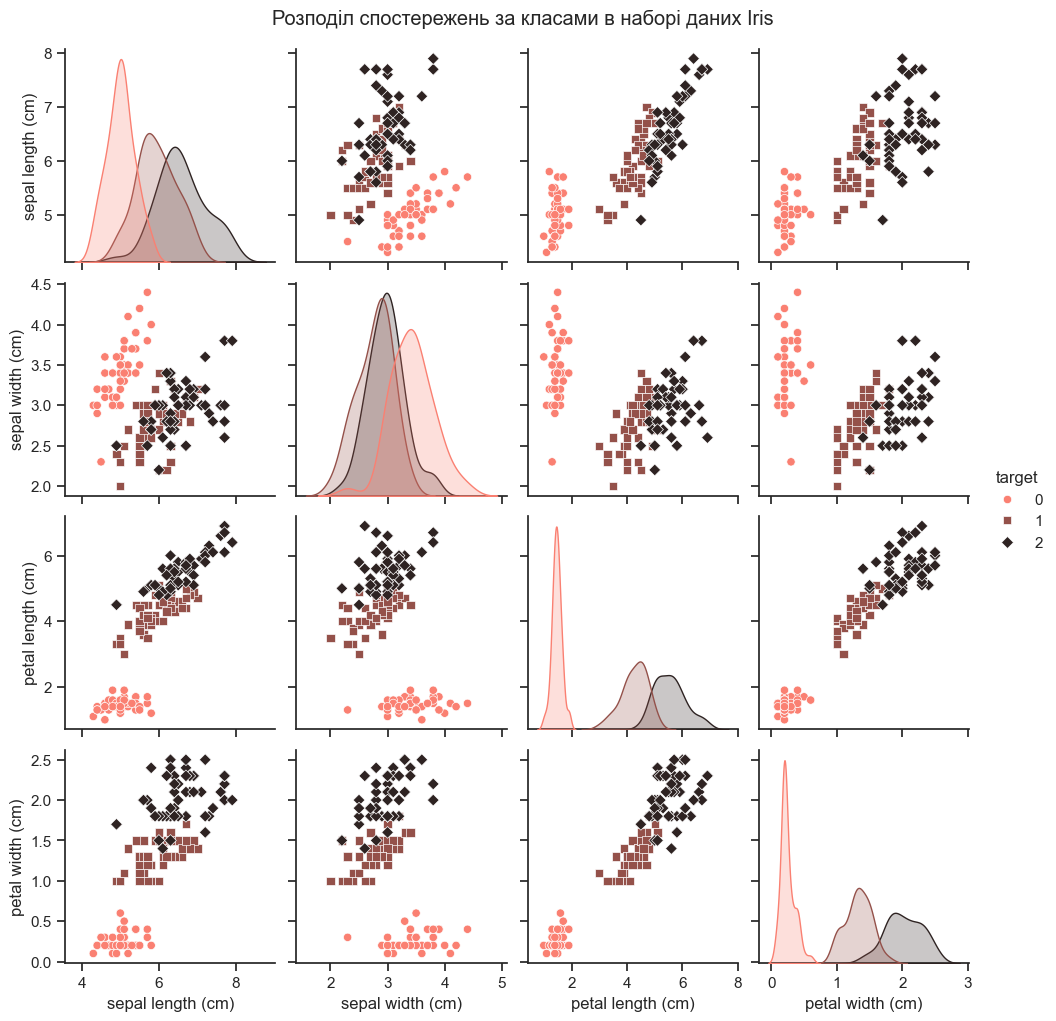

Дані після стандартизації:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


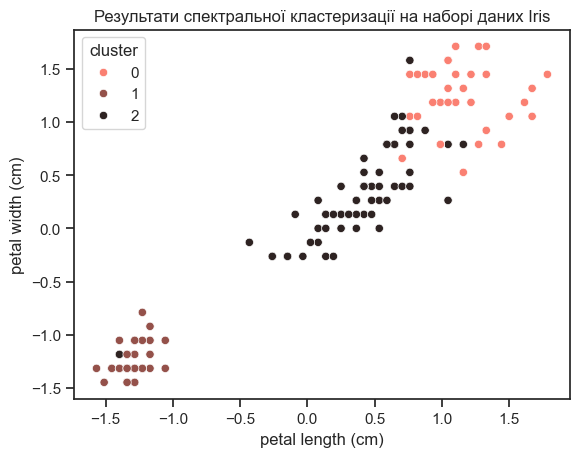

Матриця помилок:
[[ 0 49  1]
 [ 3  0 47]
 [32  0 18]]


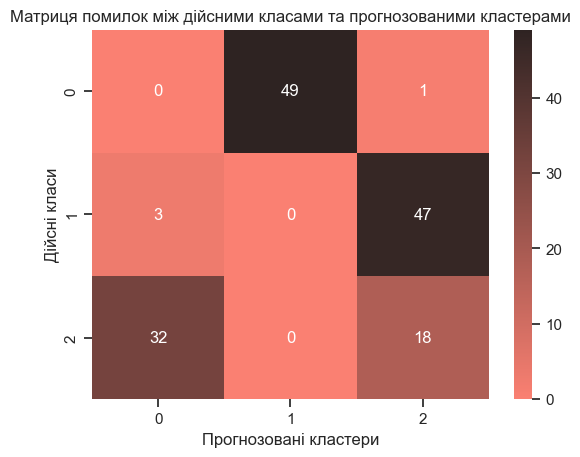

In [49]:
# Спектральна кластерізація на наборі даних Iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix

# 1. Завантаження та створення DataFrame 
iris = load_iris(as_frame=True)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

# 2. Отримання та вивід на екран базових статистичних характеристик
print ("Базові статистичні характеристики:")
display(df.describe())

#3. Візуалізація розподілення спотережень за класами
sns.set_theme(style="ticks")
sns.pairplot(df, hue="target", palette="dark:salmon_r", markers=["o", "s", "D"])
plt.suptitle("Розподіл спостережень за класами в наборі даних Iris", y=1.02)
plt.show()

# 4. Стандарталізація даних
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
print("Дані після стандартизації:")
display(df_scaled.head())

# 5. Застосування спектральної кластерізації
spectral=SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
df_scaled["cluster"] = spectral.fit_predict(df_scaled.iloc[:, :-1])

# Візуалізація результатів спектральної кластерізації
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="cluster", data=df_scaled, palette="dark:salmon_r", legend="full")
plt.title("Результати спектральної кластеризації на наборі даних Iris")
plt.show()

# 6. Порівняння спрогнозованих кластерів та дійсних класів
cm = confusion_matrix(df['target'], df_scaled['cluster'])
print("Матриця помилок:")
print(cm)

# 7. Візуалізувати результати кластеризації:
my_cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
sns.heatmap(cm, annot=True, fmt="d", cmap=my_cmap)
plt.title("Матриця помилок між дійсними класами та прогнозованими кластерами")
plt.xlabel("Прогнозовані кластери")
plt.ylabel("Дійсні класи")
plt.show()    

## Висновки:
- **Аналіз даних:**\
рафіки та цифри показали, що один вид ірисів (Iris-setosa) чітко відрізняється від інших і стоїть окремо. Натомість два інші види (Versicolor та Virginica) дуже схожі між собою, тому їхні характеристики частково змішуються.

- **Стандартизація:**\
Стандартизація вирівняла всі виміри. Завдяки цьому під час пошуку схожих квітів алгоритм не звертав увагу лише на найбільші числа, а враховував усі характеристики однаково.

- **Оцінка кластеризації:**\
Графіки та таблиці показують, що алгоритм добре виділив один вид ірисів, який чітко відрізняється від інших. Два інші види дуже схожі між собою, тому програма зробила кілька помилок там, де їхні характеристики збігаються. Для цих даних це абсолютно нормальний та очікуваний результат.

